In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append("../src/")
import models as TF_model
import data_generator as TF_data
import utilis as TF_tool

# Training Module

## Generate data

In [2]:
input_dim = 10
context_len = 200
Task_num_train = 2000
Task_num_valid = 500
pred_per_task = 1 # Number of prediction per task

# Random field parameters
tau = 5
alpha = 3

# Generate Task matrix
## Task matrix for train dataset
A_list_train = TF_data.get_random_invertible_matrix(input_dim, 
                                                    Task_num_train, 
                                                    matrix_type="Galerkin", 
                                                    tau=tau, 
                                                    alpha=alpha, 
                                                    seed_value=100) 
## Task matrix for valid dataset
A_list_valid = TF_data.get_random_invertible_matrix(input_dim, 
                                                    Task_num_valid, 
                                                    matrix_type="Galerkin", 
                                                    tau=tau, 
                                                    alpha=alpha, 
                                                    seed_value=300) 
# Generate data:
## Train dataset
input_train, output_train = TF_data.generate_data_LN_fi_ne(A_list_train, 
                                                           input_dim, 
                                                           pred_per_task+context_len,  
                                                           seed_value=100)

input_valid, output_valid = TF_data.generate_data_LN_fi_ne(A_list_valid, 
                                                           input_dim, 
                                                           pred_per_task+context_len,  
                                                           seed_value=400)

input_train_np = np.array(input_train) 
output_train_np = np.array(output_train) 
input_valid_np = np.array(input_valid) 
output_valid_np = np.array(output_valid) 

## Training process

In [3]:
batch_size = Task_num_train # Whole batch
epoch_all = 1000
lr = 0.1
device = "cuda:0"

Model_dir = ""
Data_dir =  ""
best_model_path = Model_dir + "current_model_best.pkl"
history_path_train = Data_dir + "Train_err.npy"
history_path_valid = Data_dir + "Valid_err.npy"
train_valid_X_Y = [input_train_np, output_train_np, input_valid_np, output_valid_np]

print("Data has been prepared...")

train_mse_hist, valid_mse_hist, model= TF_model.train_system(context_len, input_dim, batch_size, train_valid_X_Y, best_model_path, device=device, epoch_all=epoch_all, lr=lr)

train_mse_hist_np = np.array(train_mse_hist)
valid_mse_hist_np = np.array(valid_mse_hist)
np.save(history_path_train, train_mse_hist_np)
np.save(history_path_valid, valid_mse_hist_np)

Data has been prepared...
Epoch: 0 || ValMSE: 0.00011123827425763011, TraMSE: 0.0001071940569090657
best model saved! index: 0
Epoch: 1 || ValMSE: 0.00011026382708223537, TraMSE: 0.00010634271166054532
best model saved! index: 1
Epoch: 2 || ValMSE: 0.00010918315092567354, TraMSE: 0.00010538145579630509
best model saved! index: 2
Epoch: 3 || ValMSE: 0.00010799763549584895, TraMSE: 0.00010431171540403739
best model saved! index: 3
Epoch: 4 || ValMSE: 0.00010671032214304432, TraMSE: 0.00010313506936654449
best model saved! index: 4
Epoch: 5 || ValMSE: 0.00010532511805649847, TraMSE: 0.00010185509017901495
best model saved! index: 5
Epoch: 6 || ValMSE: 0.00010384481720393524, TraMSE: 0.00010047644900623709
best model saved! index: 6
Epoch: 7 || ValMSE: 0.00010226934682577848, TraMSE: 9.900276927510276e-05
best model saved! index: 7
Epoch: 8 || ValMSE: 0.00010059672786155716, TraMSE: 9.743477130541578e-05
best model saved! index: 8
Epoch: 9 || ValMSE: 9.882608719635755e-05, TraMSE: 9.577163

Epoch: 81 || ValMSE: 3.7442675875354325e-06, TraMSE: 3.5442856187728466e-06
best model saved! index: 81
Epoch: 82 || ValMSE: 3.694635552164982e-06, TraMSE: 3.48553453477507e-06
best model saved! index: 82
Epoch: 83 || ValMSE: 3.6461192394199315e-06, TraMSE: 3.4282795695617096e-06
best model saved! index: 83
Epoch: 84 || ValMSE: 3.5987338833365357e-06, TraMSE: 3.372775154275587e-06
best model saved! index: 84
Epoch: 85 || ValMSE: 3.5524719805835048e-06, TraMSE: 3.3192654882441275e-06
best model saved! index: 85
Epoch: 86 || ValMSE: 3.507385827106191e-06, TraMSE: 3.267987267463468e-06
best model saved! index: 86
Epoch: 87 || ValMSE: 3.463635493972106e-06, TraMSE: 3.2191544505622005e-06
best model saved! index: 87
Epoch: 88 || ValMSE: 3.421426754357526e-06, TraMSE: 3.1729382499179337e-06
best model saved! index: 88
Epoch: 89 || ValMSE: 3.3809722026489908e-06, TraMSE: 3.129433252979652e-06
best model saved! index: 89
Epoch: 90 || ValMSE: 3.3424689718231093e-06, TraMSE: 3.088663333983277e-0

Epoch: 161 || ValMSE: 2.5192430257447995e-06, TraMSE: 2.2162146251503145e-06
best model saved! index: 161
Epoch: 162 || ValMSE: 2.5152319267363055e-06, TraMSE: 2.211718083344749e-06
best model saved! index: 162
Epoch: 163 || ValMSE: 2.5113049559877254e-06, TraMSE: 2.2072899810154922e-06
best model saved! index: 163
Epoch: 164 || ValMSE: 2.5074550649151206e-06, TraMSE: 2.2029287265468156e-06
best model saved! index: 164
Epoch: 165 || ValMSE: 2.503667928976938e-06, TraMSE: 2.198630681959912e-06
best model saved! index: 165
Epoch: 166 || ValMSE: 2.499935817468213e-06, TraMSE: 2.194395392507431e-06
best model saved! index: 166
Epoch: 167 || ValMSE: 2.496250090189278e-06, TraMSE: 2.190219674957916e-06
best model saved! index: 167
Epoch: 168 || ValMSE: 2.492601197445765e-06, TraMSE: 2.1861017103219638e-06
best model saved! index: 168
Epoch: 169 || ValMSE: 2.4889857286325423e-06, TraMSE: 2.1820396796101704e-06
best model saved! index: 169
Epoch: 170 || ValMSE: 2.4854061848600395e-06, TraMSE: 

Epoch: 239 || ValMSE: 2.3108771074475953e-06, TraMSE: 1.9839492324535968e-06
best model saved! index: 239
Epoch: 240 || ValMSE: 2.309054707438918e-06, TraMSE: 1.9819335648207925e-06
best model saved! index: 240
Epoch: 241 || ValMSE: 2.307248450961197e-06, TraMSE: 1.9799333585979184e-06
best model saved! index: 241
Epoch: 242 || ValMSE: 2.305455154782976e-06, TraMSE: 1.9779490685323253e-06
best model saved! index: 242
Epoch: 243 || ValMSE: 2.3036748189042555e-06, TraMSE: 1.9759806946240133e-06
best model saved! index: 243
Epoch: 244 || ValMSE: 2.3019081254460616e-06, TraMSE: 1.9740277821256313e-06
best model saved! index: 244
Epoch: 245 || ValMSE: 2.300154392287368e-06, TraMSE: 1.9720896489161532e-06
best model saved! index: 245
Epoch: 246 || ValMSE: 2.2984140741755255e-06, TraMSE: 1.9701669771166053e-06
best model saved! index: 246
Epoch: 247 || ValMSE: 2.296685579494806e-06, TraMSE: 1.968259084605961e-06
best model saved! index: 247
Epoch: 248 || ValMSE: 2.2949693629925605e-06, TraMSE

Epoch: 318 || ValMSE: 2.1992875645082677e-06, TraMSE: 1.863463126028364e-06
best model saved! index: 318
Epoch: 319 || ValMSE: 2.19820367419743e-06, TraMSE: 1.8623371715875692e-06
best model saved! index: 319
Epoch: 320 || ValMSE: 2.1971272872178815e-06, TraMSE: 1.861219516285928e-06
best model saved! index: 320
Epoch: 321 || ValMSE: 2.196057948822272e-06, TraMSE: 1.8601094780024141e-06
best model saved! index: 321
Epoch: 322 || ValMSE: 2.1949942947685486e-06, TraMSE: 1.8590079662317294e-06
best model saved! index: 322
Epoch: 323 || ValMSE: 2.1939379166724393e-06, TraMSE: 1.8579133893581457e-06
best model saved! index: 323
Epoch: 324 || ValMSE: 2.192887222918216e-06, TraMSE: 1.856826543189527e-06
best model saved! index: 324
Epoch: 325 || ValMSE: 2.1918440324952826e-06, TraMSE: 1.8557476550995489e-06
best model saved! index: 325
Epoch: 326 || ValMSE: 2.190805844293209e-06, TraMSE: 1.8546761566540226e-06
best model saved! index: 326
Epoch: 327 || ValMSE: 2.189774249927723e-06, TraMSE: 1

Epoch: 397 || ValMSE: 2.130823986590258e-06, TraMSE: 1.7946416619452066e-06
best model saved! index: 397
Epoch: 398 || ValMSE: 2.1301400465745246e-06, TraMSE: 1.7939810277312063e-06
best model saved! index: 398
Epoch: 399 || ValMSE: 2.1294608814059757e-06, TraMSE: 1.7933251683643903e-06
best model saved! index: 399
Epoch: 400 || ValMSE: 2.1287855815899093e-06, TraMSE: 1.7926728332895436e-06
best model saved! index: 400
Epoch: 401 || ValMSE: 2.1281132376316236e-06, TraMSE: 1.7920249320013681e-06
best model saved! index: 401
Epoch: 402 || ValMSE: 2.127445441146847e-06, TraMSE: 1.7913806686919997e-06
best model saved! index: 402
Epoch: 403 || ValMSE: 2.1267803731461754e-06, TraMSE: 1.7907402707351139e-06
best model saved! index: 403
Epoch: 404 || ValMSE: 2.1261187157506356e-06, TraMSE: 1.7901040791912237e-06
best model saved! index: 404
Epoch: 405 || ValMSE: 2.125460696333903e-06, TraMSE: 1.7894716393129784e-06
best model saved! index: 405
Epoch: 406 || ValMSE: 2.124806087522302e-06, TraM

Epoch: 475 || ValMSE: 2.0868258161499398e-06, TraMSE: 1.7532007632325985e-06
best model saved! index: 475
Epoch: 476 || ValMSE: 2.0863615191046847e-06, TraMSE: 1.7527747786516557e-06
best model saved! index: 476
Epoch: 477 || ValMSE: 2.085900405290886e-06, TraMSE: 1.7523512951811426e-06
best model saved! index: 477
Epoch: 478 || ValMSE: 2.0854399735981133e-06, TraMSE: 1.7519294033263577e-06
best model saved! index: 478
Epoch: 479 || ValMSE: 2.0849824977631215e-06, TraMSE: 1.751509898895165e-06
best model saved! index: 479
Epoch: 480 || ValMSE: 2.0845270682912087e-06, TraMSE: 1.7510922134533757e-06
best model saved! index: 480
Epoch: 481 || ValMSE: 2.084073230435024e-06, TraMSE: 1.7506772564956918e-06
best model saved! index: 481
Epoch: 482 || ValMSE: 2.0836209841945674e-06, TraMSE: 1.7502629816590343e-06
best model saved! index: 482
Epoch: 483 || ValMSE: 2.0831712390645407e-06, TraMSE: 1.7498520037406706e-06
best model saved! index: 483
Epoch: 484 || ValMSE: 2.0827237676712684e-06, Tra

Epoch: 553 || ValMSE: 2.0557697553158505e-06, TraMSE: 1.725080210235319e-06
best model saved! index: 553
Epoch: 554 || ValMSE: 2.0554275579343084e-06, TraMSE: 1.7247734831471462e-06
best model saved! index: 554
Epoch: 555 || ValMSE: 2.055086724794819e-06, TraMSE: 1.724467665553675e-06
best model saved! index: 555
Epoch: 556 || ValMSE: 2.0547463464026805e-06, TraMSE: 1.7241630985154188e-06
best model saved! index: 556
Epoch: 557 || ValMSE: 2.0544073322525946e-06, TraMSE: 1.723860009406053e-06
best model saved! index: 557
Epoch: 558 || ValMSE: 2.0540680907288333e-06, TraMSE: 1.7235576024177135e-06
best model saved! index: 558
Epoch: 559 || ValMSE: 2.0537322598102037e-06, TraMSE: 1.723255991237238e-06
best model saved! index: 559
Epoch: 560 || ValMSE: 2.053395974144223e-06, TraMSE: 1.7229557442988153e-06
best model saved! index: 560
Epoch: 561 || ValMSE: 2.053061962214997e-06, TraMSE: 1.7226564068550942e-06
best model saved! index: 561
Epoch: 562 || ValMSE: 2.0527272681647446e-06, TraMSE:

Epoch: 632 || ValMSE: 2.0317049802542897e-06, TraMSE: 1.7036151120919385e-06
best model saved! index: 632
Epoch: 633 || ValMSE: 2.031432813964784e-06, TraMSE: 1.7033726180670783e-06
best model saved! index: 633
Epoch: 634 || ValMSE: 2.031161784543656e-06, TraMSE: 1.7031317156579462e-06
best model saved! index: 634
Epoch: 635 || ValMSE: 2.0308907551225275e-06, TraMSE: 1.7028910406224895e-06
best model saved! index: 635
Epoch: 636 || ValMSE: 2.030620635196101e-06, TraMSE: 1.7026502519001951e-06
best model saved! index: 636
Epoch: 637 || ValMSE: 2.0303521068854025e-06, TraMSE: 1.7024107137331157e-06
best model saved! index: 637
Epoch: 638 || ValMSE: 2.030083578574704e-06, TraMSE: 1.7021718576870626e-06
best model saved! index: 638
Epoch: 639 || ValMSE: 2.029815277637681e-06, TraMSE: 1.7019334563883604e-06
best model saved! index: 639
Epoch: 640 || ValMSE: 2.0295487956900615e-06, TraMSE: 1.7016953961501713e-06
best model saved! index: 640
Epoch: 641 || ValMSE: 2.0292814042477403e-06, TraMS

Epoch: 710 || ValMSE: 2.0122877231187886e-06, TraMSE: 1.6863202745298622e-06
best model saved! index: 710
Epoch: 711 || ValMSE: 2.01206012206967e-06, TraMSE: 1.6861163203429896e-06
best model saved! index: 711
Epoch: 712 || ValMSE: 2.0118316115258494e-06, TraMSE: 1.6859135030244943e-06
best model saved! index: 712
Epoch: 713 || ValMSE: 2.011604237850406e-06, TraMSE: 1.6857104583323235e-06
best model saved! index: 713
Epoch: 714 || ValMSE: 2.0113775462959893e-06, TraMSE: 1.6855078683875035e-06
best model saved! index: 714
Epoch: 715 || ValMSE: 2.0111519916099496e-06, TraMSE: 1.6853060742505477e-06
best model saved! index: 715
Epoch: 716 || ValMSE: 2.010924845308182e-06, TraMSE: 1.685104166426754e-06
best model saved! index: 716
Epoch: 717 || ValMSE: 2.010700200116844e-06, TraMSE: 1.6849030544108246e-06
best model saved! index: 717
Epoch: 718 || ValMSE: 2.0104748728044797e-06, TraMSE: 1.6847020560817327e-06
best model saved! index: 718
Epoch: 719 || ValMSE: 2.0102495454921154e-06, TraMSE

Epoch: 789 || ValMSE: 1.9955350580858067e-06, TraMSE: 1.6713491959308158e-06
best model saved! index: 789
Epoch: 790 || ValMSE: 1.9953383798565483e-06, TraMSE: 1.6711729813323473e-06
best model saved! index: 790
Epoch: 791 || ValMSE: 1.9951421563746408e-06, TraMSE: 1.6709967667338788e-06
best model saved! index: 791
Epoch: 792 || ValMSE: 1.994944796024356e-06, TraMSE: 1.6708210068827611e-06
best model saved! index: 792
Epoch: 793 || ValMSE: 1.9947497094108257e-06, TraMSE: 1.6706458154658321e-06
best model saved! index: 793
Epoch: 794 || ValMSE: 1.9945534859289182e-06, TraMSE: 1.6704708514225786e-06
best model saved! index: 794
Epoch: 795 || ValMSE: 1.994358399315388e-06, TraMSE: 1.6702961147530004e-06
best model saved! index: 795
Epoch: 796 || ValMSE: 1.9941646769439103e-06, TraMSE: 1.6701212643965846e-06
best model saved! index: 796
Epoch: 797 || ValMSE: 1.99396959033038e-06, TraMSE: 1.6699474372217082e-06
best model saved! index: 797
Epoch: 798 || ValMSE: 1.9937754132115515e-06, TraM

Epoch: 867 || ValMSE: 1.9811536731140222e-06, TraMSE: 1.6584575632805354e-06
best model saved! index: 867
Epoch: 868 || ValMSE: 1.9809813238680363e-06, TraMSE: 1.6583028354943963e-06
best model saved! index: 868
Epoch: 869 || ValMSE: 1.9808085198746994e-06, TraMSE: 1.6581484487687703e-06
best model saved! index: 869
Epoch: 870 || ValMSE: 1.9806382169917924e-06, TraMSE: 1.6579944031036575e-06
best model saved! index: 870
Epoch: 871 || ValMSE: 1.9804663224931573e-06, TraMSE: 1.6578403574385447e-06
best model saved! index: 871
Epoch: 872 || ValMSE: 1.980294882741873e-06, TraMSE: 1.6576868802076206e-06
best model saved! index: 872
Epoch: 873 || ValMSE: 1.980125034606317e-06, TraMSE: 1.6575336303503718e-06
best model saved! index: 873
Epoch: 874 || ValMSE: 1.979953140107682e-06, TraMSE: 1.657380835240474e-06
best model saved! index: 874
Epoch: 875 || ValMSE: 1.9797830645984504e-06, TraMSE: 1.6572278127569007e-06
best model saved! index: 875
Epoch: 876 || ValMSE: 1.979614125957596e-06, TraMS

Epoch: 945 || ValMSE: 1.9685528513946338e-06, TraMSE: 1.647142312322103e-06
best model saved! index: 945
Epoch: 946 || ValMSE: 1.9684025573951658e-06, TraMSE: 1.6470070249852142e-06
best model saved! index: 946
Epoch: 947 || ValMSE: 1.9682511265273206e-06, TraMSE: 1.6468712829009746e-06
best model saved! index: 947
Epoch: 948 || ValMSE: 1.9681017420225544e-06, TraMSE: 1.6467362229377613e-06
best model saved! index: 948
Epoch: 949 || ValMSE: 1.967950311154709e-06, TraMSE: 1.646601162974548e-06
best model saved! index: 949
Epoch: 950 || ValMSE: 1.9678016087709693e-06, TraMSE: 1.6464663303850102e-06
best model saved! index: 950
Epoch: 951 || ValMSE: 1.967650632650475e-06, TraMSE: 1.6463322936033364e-06
best model saved! index: 951
Epoch: 952 || ValMSE: 1.9675017028930597e-06, TraMSE: 1.646197688387474e-06
best model saved! index: 952
Epoch: 953 || ValMSE: 1.9673514088935917e-06, TraMSE: 1.646063765292638e-06
best model saved! index: 953
Epoch: 954 || ValMSE: 1.9672031612572027e-06, TraMSE

## Training process visualization

Text(0, 0.5, 'Error')

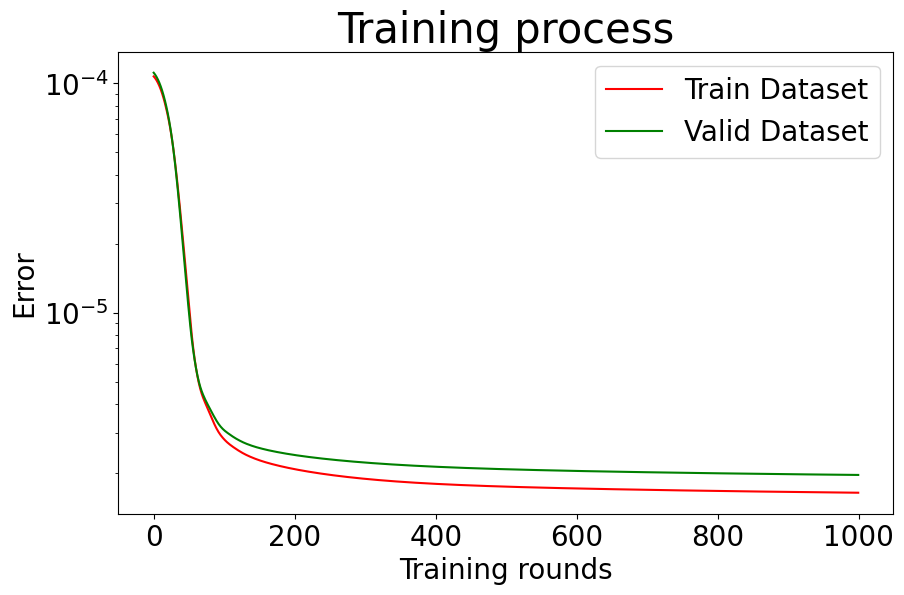

In [4]:
f, ax = plt.subplots(figsize=(10,6))
plt.plot(train_mse_hist, color="red", label="Train Dataset")
plt.plot(valid_mse_hist, color="green", label="Valid Dataset")
ax.set(yscale="log")
plt.title("Training process", fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Training rounds",fontsize=20)
plt.ylabel("Error",fontsize=20)

# Prediction

## Generate data for Test Dataset

In [6]:
## Task matrix for valid dataset
Task_num_test = 1000
print("Generating a Test dataset with " + str(Task_num_test) + " Tasks...")
A_list_test = TF_data.get_random_invertible_matrix(input_dim, 
                                                    Task_num_test, 
                                                    matrix_type="Galerkin", 
                                                    tau=tau, 
                                                    alpha=alpha, 
                                                    seed_value=2024) 
# Generate data:
## Train dataset
input_test, output_test = TF_data.generate_data_LN_fi_ne(A_list_test, 
                                                           input_dim, 
                                                           pred_per_task+context_len,  
                                                           seed_value=2024)

input_test_np = np.array(input_test) 
output_test_np = np.array(output_test) 


Generating a Test dataset with 1000 Tasks...


In [7]:
pred_np, target_np, _, _ = TF_model.predict(context_len, input_dim, device, input_test_np, output_test_np, best_model_path, batchsize=1)
print("Finish prediction")

Start loading
Finish prediction


In [10]:
print("Info of Transformer: ")

print("-- Dimension (d): " + str(input_dim))
print("-- Context length (d): " + str(context_len))
print("-- Task num for training (N): " + str(context_len))
print("-- Training rounds: " + str(epoch_all))

print("Info of Transformer performance on Test Dataset: ")
print("-- Task num for testing: " + str(Task_num_test))
err_l2, err_l2_r, err_h1, err_h1_r = TF_tool.l2_H1_err_l2_H1_relative_G(pred_np, target_np, start=0, end=1)
print("-- L2 Error: " + str(round(err_l2,5)))
print("-- Relative L2 Error: " + str(round(err_l2_r,5)))
print("-- H1 Error: " + str(round(err_h1,5)))
print("-- Relative  H1 Error: " + str(round(err_h1_r,5)))

Info of Transformer: 
-- Dimension (d): 10
-- Context length (d): 200
-- Task num for training (N): 200
-- Training rounds: 1000
Info of Transformer performance on Test Dataset: 
-- Task num for testing: 1000
-- L2 Error: 0.01588
-- Relative L2 Error: 0.09396
-- H1 Error: 0.2188
-- Relative  H1 Error: 0.26679
